# **Importing important libraries**

---



In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Reading the dataset**

---



In [207]:
df=pd.read_csv("/content/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# **Data Analysis**

---



In [208]:
df.shape

(8124, 23)

There are **8124** rows & **23** columns. This means there are **8124** datapoints in the dataset & **23** features.

In [297]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

The feature "**class**" is the **target feature**

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

we need to encode all the **object** into **int** or **float**

In [210]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Luckily we dont have any **missing values**, That is good for us.

# **Data Preprocessing**

---



Lets **Encode** all the **objects**

In [211]:
#encoding class

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [212]:
Cls={'e':0,'p':1}
df['class'] = df['class'].map(Cls)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [213]:
#encoding cap shape

df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [214]:
cap={'x':0,'f':1,'k':2,'b':3,'s':4,'c':5}
df['cap-shape'] = df['cap-shape'].map(cap)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [215]:
#encoding cap surface

df['cap-surface'].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [216]:
capsur={'y':0,'s':1,'f':2,'g':3}
df['cap-surface'] = df['cap-surface'].map(capsur)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [217]:
#encoding cap color

df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [218]:
capcol={'n':0,'g':1,'e':2,'y':3,'w':4,'b':5,'p':6,'c':7,'r':8,'u':9}
df['cap-color'] = df['cap-color'].map(capcol)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [219]:
#encoding bruises

df['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

In [220]:
bru={'f':0,'t':1}
df['bruises'] = df['bruises'].map(bru)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [221]:
#encoding odor

df['odor'].value_counts()

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [222]:
odr={'n':0,'f':1,'s':2,'y':3,'a':4,'l':5,'p':6,'c':7,'m':8}
df['odor']=df['odor'].map(odr)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [223]:
#encoding gill attachment

df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [224]:
gilatc={'f':0,'a':1}
df['gill-attachment'] = df['gill-attachment'].map(gilatc)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [225]:
#encoding gill spacing

df['gill-spacing'].value_counts()


c    6812
w    1312
Name: gill-spacing, dtype: int64

In [226]:
gilspc={'c':0,'w':1}
df['gill-spacing'] = df['gill-spacing'].map(gilspc)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [227]:
#encoding gill size

df['gill-size'].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [228]:
gilsz={'b':0,'n':1}
df['gill-size'] = df['gill-size'].map(gilsz)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [229]:
#encoding gill color

df['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [230]:
gilcol={'b':0,'p':1,'w':2,'n':3,'g':4,'h':5,'u':6,'k':7,'e':8,'y':9,'o':10,'r':11}
df['gill-color'] = df['gill-color'].map(gilcol)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,t,?,s,k,w,w,p,w,o,e,w,v,l


In [231]:
#encoding stalk shape

df['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [232]:
stsh={'t':0,'e':1}
df['stalk-shape']=df['stalk-shape'].map(stsh)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,e,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,c,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,c,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,e,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,?,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,?,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,?,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,?,s,k,w,w,p,w,o,e,w,v,l


In [233]:
#encoding stalk root

df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [234]:
str={'b':0,'?':1,'e':2,'c':3,'r':4}
df['stalk-root'] = df['stalk-root'].map(str)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,s,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,s,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,s,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,s,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,s,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,s,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,s,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,s,k,w,w,p,w,o,e,w,v,l


In [235]:
#encoding stalk surface above ring

df['stalk-surface-above-ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [236]:
stsurab={'s':0,'k':1,'f':2,'y':3}
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map(stsurab)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,s,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,s,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,s,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,s,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,s,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,s,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,s,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,k,w,w,p,w,o,e,w,v,l


In [237]:
#encoding stalk surface below ring

df['stalk-surface-below-ring'].value_counts()

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64

In [238]:
stsurbr={'s':0,'k':1,'f':2,'y':3}
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map(stsurbr)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,w,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,w,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,w,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,w,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,o,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,o,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,o,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,w,w,p,w,o,e,w,v,l


In [239]:
#encoding stalk color above ring

df['stalk-color-above-ring'].value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64

In [240]:
scar={'w':0,'p':1,'g':2,'n':3,'b':4,'o':5,'e':6,'c':7,'y':8}
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map(scar)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,w,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,w,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,w,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,w,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,o,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,o,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,o,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,w,p,w,o,e,w,v,l


In [241]:
#encoding stalk color below ring

df['stalk-color-below-ring'].value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64

In [242]:
scbr={'w':0,'p':1,'g':2,'n':3,'b':4,'o':5,'e':6,'c':7,'y':8}
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map(scbr)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,p,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,p,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,p,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,p,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,p,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,p,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,p,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,p,w,o,e,w,v,l


In [243]:
#encoding veil type

df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [244]:
df=df.drop(['veil-type'],axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,w,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,w,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,w,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,w,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,o,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,n,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,o,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,w,o,e,w,v,l


In [245]:
#encoding veil color

df['veil-color'].value_counts()

w    7924
o      96
n      96
y       8
Name: veil-color, dtype: int64

In [246]:
vc={'w':0,'o':1,'n':2,'y':3}
df['veil-color'] = df['veil-color'].map(vc)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,0,o,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,0,o,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,0,o,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,0,o,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,0,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,1,o,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,2,o,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,1,o,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,o,e,w,v,l


In [247]:
#encoding ring number

df['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

In [248]:
rn={'o':0,'t':1,'n':2}
df['ring-number'] = df['ring-number'].map(rn)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,0,0,p,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,0,0,p,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,0,0,p,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,0,0,p,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,0,0,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,1,0,p,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,2,0,p,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,1,0,p,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,0,e,w,v,l


In [249]:
#encoding ring type

df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [250]:
rt={'p':0,'e':1,'l':2,'f':3,'n':4}
df['ring-type'] = df['ring-type'].map(rt)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,0,0,0,k,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,0,0,0,n,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,0,0,0,n,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,0,0,0,k,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,0,0,1,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,1,0,0,b,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,2,0,0,b,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,1,0,0,b,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,0,1,w,v,l


In [251]:
#encoding spore print color

df['spore-print-color'].value_counts()

w    2388
n    1968
k    1872
h    1632
r      72
y      48
o      48
u      48
b      48
Name: spore-print-color, dtype: int64

In [252]:
spc={'w':0,'n':1,'k':2,'h':3,'r':4,'b':5,'o':6,'u':7,'y':8}
df['spore-print-color'] = df['spore-print-color'].map(spc)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,0,0,0,2,s,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,0,0,0,1,n,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,0,0,0,1,n,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,0,0,0,2,s,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,0,0,1,1,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,1,0,0,5,c,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,2,0,0,5,v,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,1,0,0,5,c,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,0,1,0,v,l


In [253]:
#encoding population

df['population'].value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [254]:
pop={'v':0,'y':1,'s':2,'n':3,'a':4,'c':5}
df['population'] = df['population'].map(pop)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,0,0,0,2,2,u
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,0,0,0,1,3,g
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,0,0,0,1,3,m
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,0,0,0,2,2,u
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,0,0,1,1,4,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,1,0,0,5,5,l
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,2,0,0,5,0,l
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,1,0,0,5,5,l
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,l


In [255]:
#encoding habitat

df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [256]:
hab={'d':0,'g':1,'p':2,'l':3,'u':4,'m':5,'w':6}
df['habitat'] = df['habitat'].map(hab)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,1,2,0,0,0,0,0,0,0,2,2,4
1,0,0,1,3,1,4,0,0,0,7,1,3,0,0,0,0,0,0,0,1,3,1
2,0,3,1,4,1,5,0,0,0,3,1,3,0,0,0,0,0,0,0,1,3,5
3,1,0,0,4,1,6,0,0,1,3,1,2,0,0,0,0,0,0,0,2,2,4
4,0,0,1,1,0,0,0,1,0,7,0,2,0,0,0,0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,1,1,0,0,5,5,1,0,0,5,5,3
8120,0,0,1,0,0,0,1,0,0,9,1,1,0,0,5,5,2,0,0,5,0,3
8121,0,1,1,0,0,0,1,0,0,3,1,1,0,0,5,5,1,0,0,5,5,3
8122,1,2,0,0,0,3,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,3


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

We dont have any other object type feature, we are good to go for the next step.

# **Data Visualization**

---



Lets **visualize** all the features and observe all the relations with **target** **feature** and **other feature**

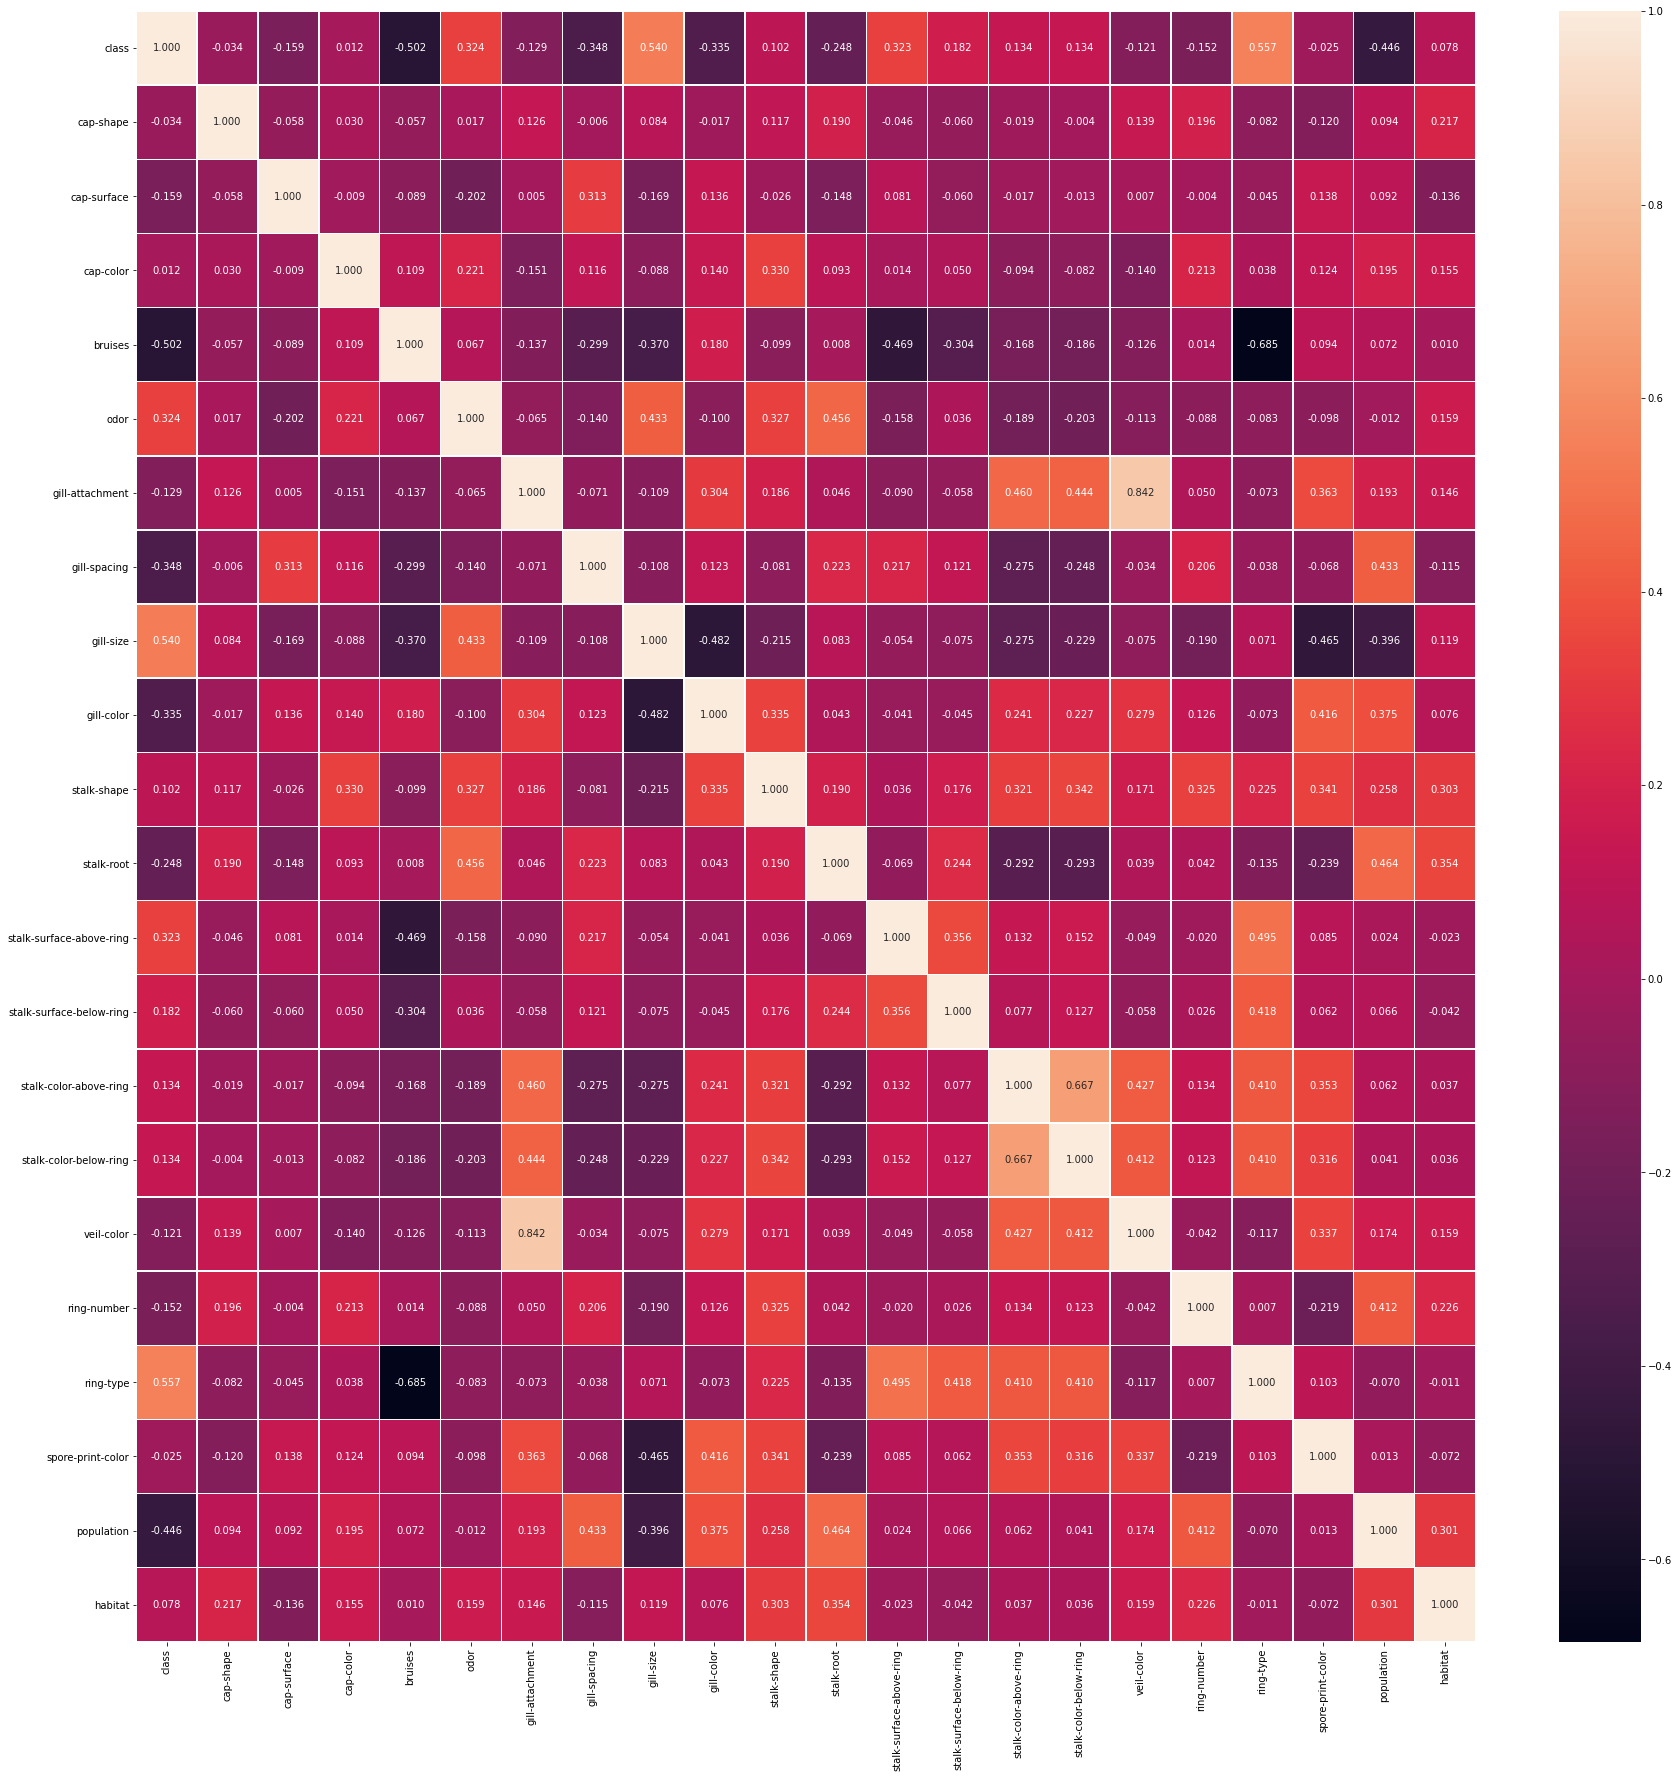

In [257]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.3f')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


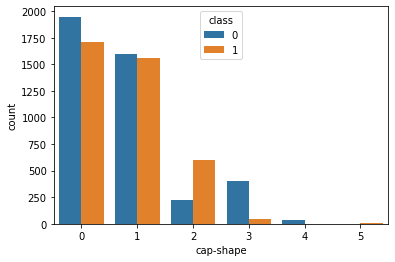

In [259]:
sns.countplot(df['cap-shape'],hue = 'class', data = df)

Here **cap-shape**: [**convex** = x = **0**], [**flat** = f = **1**], [**knobbed** = k = **2**], [**bell** = b = **3**], [**sunken** = s = **4** ], [**conical** = c = **5**]

we can see Mushrooms with cap shape of bell is more edible than other cap shapes Mushrooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


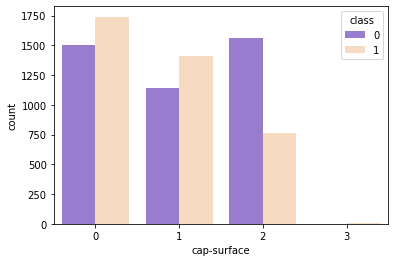

In [260]:
sns.countplot(df['cap-surface'],hue = 'class', data = df, palette=('mediumpurple','peachpuff'))

Here **cap-surface**: [**scaly** = y = **0**], [**smooth** = s = **1**], [**fibrous** = f = **2**], [**grooves** = g = **3**] 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


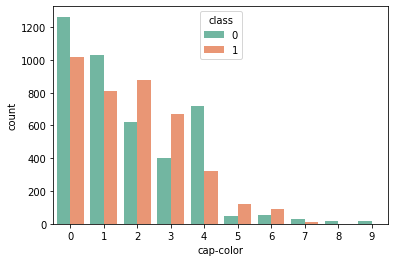

In [261]:
sns.countplot(df['cap-color'],hue = 'class', data = df,palette=("Set2"))

Here **cap-color**: [**brown** = n = **0**], [**gray** = g = **1**], [**red** = e = **2**],[ **yellow** = y = **3**], [**white** = w = **4**],[ **buff** = b = **5**],[ **pink** = p = **6**], [**cinnamon** = c = **7**], [**green** = r = **8**], [**purple** = u = **9**]  

we can see Mushrooms with cap color of **red** and **yellow** are more **poisonous**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


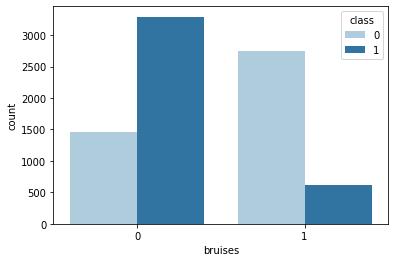

In [262]:
sns.countplot(df['bruises'],hue = 'class', data = df,palette=("Paired"))

Here bruises: [No = false = 0], [Yes = true = 1]

Mushrooms with bruises are more edible than the not bruises mushroom

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


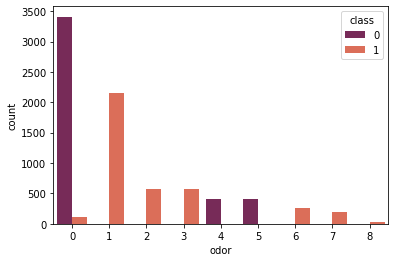

In [263]:
sns.countplot(df['odor'],hue = 'class', data = df,palette=("rocket"))

Here **odor**:  [**none** = n = **0**],[ **foul** = f = **1**],[ **spicy** = s = **2**],[ **fishy** = y = **3**],[**almond** = a = **4**],[ **anise** = l = **5**],[ **pungent** = p = **6**],[ **creosote** = c = **7**], [ **musty** = m = **8**]

From the graph, we can say the odor of the mushrooms  playing an important role in distinguishing the class of the mushrooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


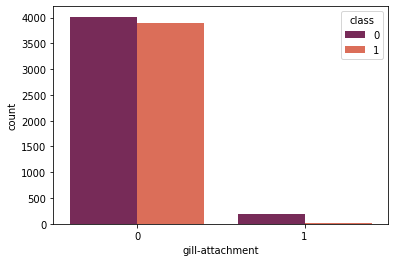

In [264]:
sns.countplot(df['gill-attachment'],hue = 'class', data = df,palette=("rocket"))

In this case **gill-attachment**:[**attached** = a = **1**] , [**free** = f = **0**]

Free gill attachments are almost **half** edible or **poisonous**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


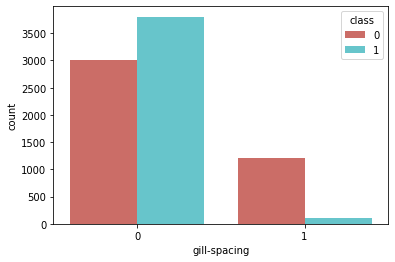

In [265]:
sns.countplot(df['gill-spacing'],hue = 'class', data = df,palette=("hls"))


 Here gill-spacing: [**close** = c = **0**], [**crowded** = w = **1**]

From the graph here we see **crowded gill spacing**  more **edible** than the **close gill spacing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


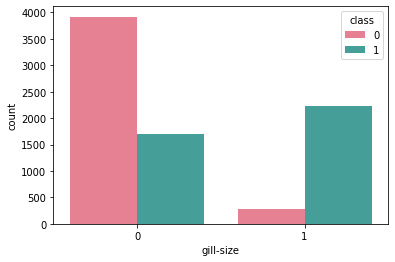

In [266]:
sns.countplot(df['gill-size'],hue = 'class', data = df,palette=("husl"))

Here **gill-size**: [**broad** = b = **0**], [**narrow** = n = **1**]

**Narrow** gill size is more **poisonous** than the **broad** gill size


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


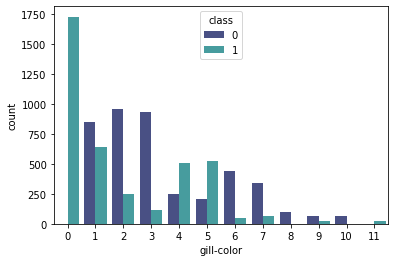

In [267]:
sns.countplot(df['gill-color'],hue = 'class', data = df,palette=("mako"))

Here gill-color: [**buff** = b = **0**], [**pink** = p = **1**], [**white** = w = **2**], [**brown** = n = **3**], [**gray** = g = **4**], [**chocolate** = h = **5**], [**purple** = u = **6**], [**black** = k = **7**], [**red** = e = **8**],[**yellow** = y = **9**], [**orange** = o = 10], [**green** = r = **11**]




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


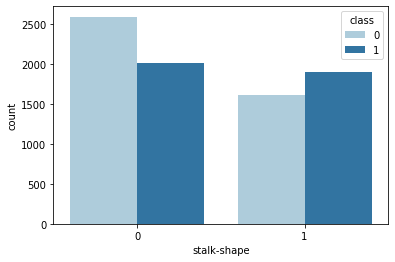

In [268]:
sns.countplot(df['stalk-shape'],hue = 'class', data = df,palette=("Paired"))

Here **stalk-shape**: [**tapering** = t = **0**], [**enlarging** = e = **1**]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


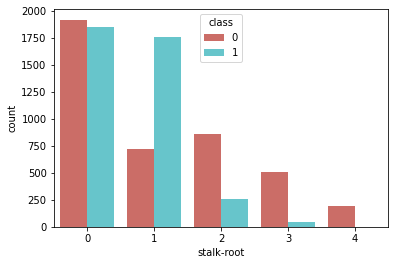

In [269]:
sns.countplot(df['stalk-root'],hue = 'class', data = df,palette=("hls"))


Here **stalk-root** : [**bulbous**= b = **0**],[ **missing** = ? = **1**],[**equal** = e = **2**],[ **club** = c = **3**], [ **rooted** = r = **4**]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


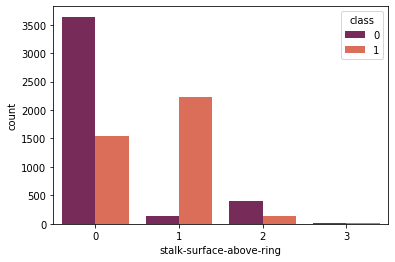

In [270]:
sns.countplot(df['stalk-surface-above-ring'],hue = 'class', data = df,palette=("rocket"))



**stalk-surface-above-ring**:[**smooth** = s = **0**],[**silky** = k = 1], [**fibrous** = f = **2**],[ **scaly** = y = **3**]

It seems **Stalk Surface** with **silky** are more poisonous  than other types of Stalk Surface

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


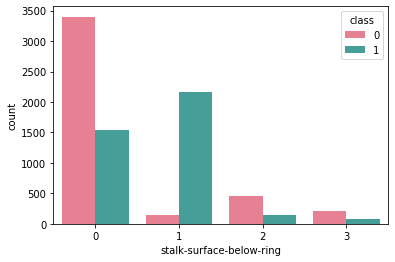

In [271]:
sns.countplot(df['stalk-surface-below-ring'],hue = 'class', data = df,palette=("husl"))

**stalk-surface-below-ring**:[**smooth** = s = **0**],[**silky** = k = 1], [**fibrous** = f = **2**],[ **scaly** = y = **3**]

Same as Stalk Surface Above Ring, Silky looks more poisonous  than other types of Stalk Surface




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


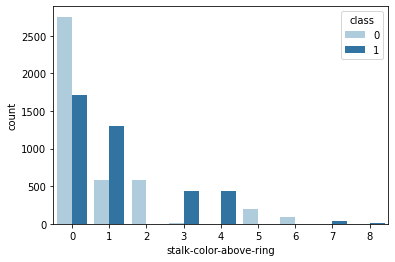

In [272]:
sns.countplot(df['stalk-color-above-ring'],hue = 'class', data = df,palette=("Paired"))



Here **stalk-color-above-ring**: [**white** = w = **0**], [**pink** = p = **1**], [**gray** = g = **2**],[**brown** = n = **3**], [ **buff** = b = **4**], [**orange** = o = **5**], [**red** = e = **6**], [**cinnamon** = c = **7**], [**yellow** = y = **8**]


It seems Stalk Color Above Ring with **pink,brown** and **buff** are more **poisonous**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


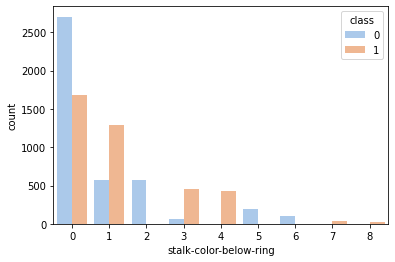

In [273]:
sns.countplot(df['stalk-color-below-ring'],hue = 'class', data = df,palette=("pastel"))

Here **stalk-color-above-ring**: [**white** = w = **0**], [**pink** = p = **1**], [**gray** = g = **2**],[**brown** = n = **3**], [ **buff** = b = **4**], [**orange** = o = **5**], [**red** = e = **6**], [**cinnamon** = c = **7**], [**yellow** = y = **8**]


We can see **Stalk Color** Below Ring with **pink**,**brown** and **buff** are more poisonous.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


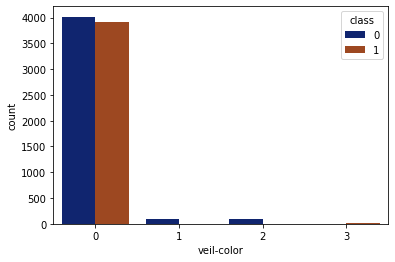

In [274]:
sns.countplot(df['veil-color'],hue = 'class', data = df,palette=("dark"))


Here  **veil-color**: [**white** = w = **0**],[ **orange** = o = **1**],[ **brown** = n = **2**], [**yellow** = y = **3**]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


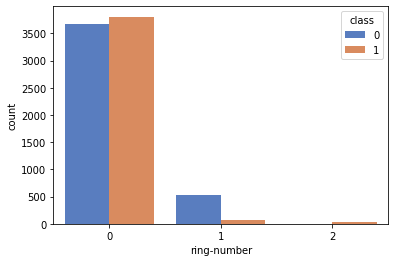

In [275]:
sns.countplot(df['ring-number'],hue = 'class', data = df,palette=("muted"))

Here **ring-number**: [**one** = o = **0**], [**two** = t = **1**], [**none** = n = **2**] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


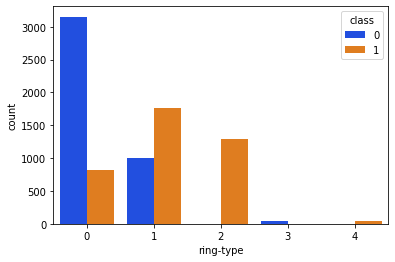

In [276]:
sns.countplot(df['ring-type'],hue = 'class', data = df,palette=("bright"))

{'p':0,'e':1,'l':2,'f':3,'n':4}

Here **ring-type**: [**evanescent** = e = **1**], [**large** = l = 2],[ **flaring** = f = **3**], [**none** = n = **4**]

**Large Ring Type** in mushrooms are more dangerous

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


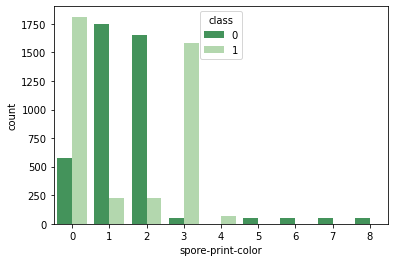

In [277]:
sns.countplot(df['spore-print-color'],hue = 'class', data = df,palette=("Greens_r"))

{'w':0,'n':1,'k':2,'h':3,'r':4,'b':5,'o':6,'u':7,'y':8}

**spore-print-color**: [**white** = w = **0**], [**brown** = n = **1**],[**black** = k = **2**], [**chocolate** = h = **3**],  [**green** = r =** 4**], [**buff** = b = **5**], [**orange **= o = **6**],[**purple** = u = **7**], [**yellow** = y = **8**]
  
 **White** and **chocolate** spore Colors look poisinous more than other colors.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


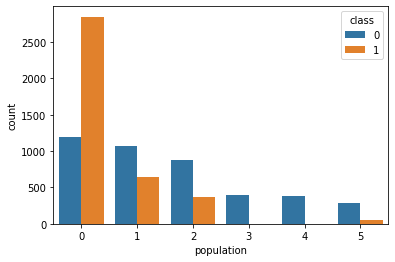

In [278]:
sns.countplot(df['population'],hue = 'class', data = df,palette=("tab10"))

**population**:  [**several** = v = **0**], [**solitary** = y = **1**], [**scattered** = s =** 2**], [**numerous** = n = **3**], [**abundant** = a = **4**], [**clustered** = c =**5**]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


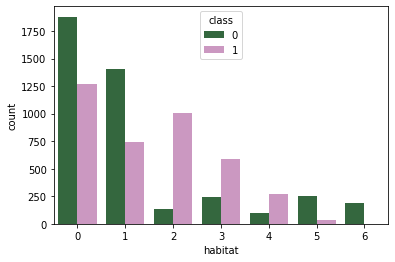

In [279]:
sns.countplot(df['habitat'],hue = 'class', data = df,palette=("cubehelix"))



**habitat**:  [woods = d = 0], [grasses = g = 1], [paths = p = 2], [leaves = l = 3], [urban = u = 4], [meadows = m = 5],  [waste = w = 6]

# **Build the Models**

---



Lets **split** the dataset into **train set** and **test set**

In [280]:
from sklearn.model_selection import train_test_split
x=df.drop('class',axis=1)
y=df['class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30) # splitting data in training set(70%) and test set(30%)

In [281]:
X_train.shape

(5686, 21)

In [282]:
y_train.shape

(5686,)

In [283]:
X_test.shape

(2438, 21)

In [284]:
y_test.shape

(2438,)

# **Importing all the models from sklearn**

---



In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **Logistic Regression**

---



In [286]:
lr = LogisticRegression() #create the object of the model
lr = lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [287]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

act = accuracy_score(y_train,lr.predict(X_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,lr.predict(X_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,lr.predict(X_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,lr.predict(X_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  50.61554695743933
Training Precision is:  48.81569207994079
Training Recall is:  48.06851311953353
Training F1 Score is:  48.43922144693353


In [288]:
act = accuracy_score(y_test,lr.predict(X_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,lr.predict(X_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,lr.predict(X_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,lr.predict(X_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  50.205086136177194
Test Precision is:  48.22635135135135
Test Recall is:  48.72013651877133
Test F1 Score is:  48.47198641765704


# **Random Forest Classifier**

---



In [289]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
rf = rf.fit(x_train,y_train)

In [290]:
act = accuracy_score(y_train,rf.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,rf.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,rf.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,rf.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


In [298]:
act = accuracy_score(y_test,rf.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,rf.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,rf.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,rf.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


# **Decision Tree Classifier**

---



In [292]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt=dt.fit(x_train, y_train)

In [293]:
act = accuracy_score(y_train,dt.predict(x_train))
print('Training Accuracy is: ',(act*100))
p = precision_score(y_train,dt.predict(x_train))
print('Training Precision is: ',(p*100))
r = recall_score(y_train,dt.predict(x_train))
print('Training Recall is: ',(r*100))
f = f1_score(y_train,dt.predict(x_train))
print('Training F1 Score is: ',(f*100))

Training Accuracy is:  100.0
Training Precision is:  100.0
Training Recall is:  100.0
Training F1 Score is:  100.0


In [294]:
act = accuracy_score(y_test,dt.predict(x_test))
print('Test Accuracy is: ',(act*100))
p = precision_score(y_test,dt.predict(x_test))
print('Test Precision is: ',(p*100))
r = recall_score(y_test,dt.predict(x_test))
print('Test Recall is: ',(r*100))
f = f1_score(y_test,dt.predict(x_test))
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  100.0
Test Precision is:  100.0
Test Recall is:  100.0
Test F1 Score is:  100.0


## **Random forest** and **Decision tree** both model outputs are **accurate**